In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
train = pd.read_csv('../Data/train_PCA_jmk_lnd.csv')
test = pd.read_csv('../Data/test_PCA_jmk_lnd.csv')
valid = pd.read_csv('../Data/valid_PCA_jmk_lnd.csv')
print(train.shape)
print(test.shape)
print(valid.shape)

(59191, 91)
(2957, 91)
(6898, 91)


In [4]:
df = pd.concat([train, test, valid])

print(df.shape)

df.sample()

(69046, 91)


,address,address1,address2,ahsm_dstnc,bldng_ar,bldng_cnt,bldng_cnt_in_50m,cctv_dstnc,cctv_in_100m,day,...,lnd_us_sttn_nm_천,lnd_us_sttn_nm_구,lnd_us_sttn_nm_체,lnd_us_sttn_nm_과,lnd_us_sttn_nm_묘,lnd_us_sttn_nm_공,lnd_us_sttn_nm_원,lnd_us_sttn_nm_사,lnd_us_sttn_nm_제,lnd_us_sttn_nm_수
20672,사천시 곤양면,사천시,곤양면,685,0.0,2,1,340,0,8,...,False,False,False,False,False,False,False,False,False,False


In [11]:
columns = [# 인덱스 
 'id', 'tag', 'fire_yes'
# 날짜
, 'year', 'month', 'day', 'dayofweek', 'year-month', 'year-month-day', 'hour', 'minute', 'second'
 # 날씨
 , 'tmprtr', 'ttl_ar', 'wnd_drctn', 'wnd_spd' , 'hmdt'
# 건물정보
 , 'bldng_ar', 'lnd_ar', 'bldng_cnt'
# 소방시설(지역특성)
 , 'fr_mn_cnt', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc', 'fr_wthr_fclt_in_100m', 'hm_cnt'
 # 도심(지역특성)
  , 'no_tbc_zn_dstnc',  'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc', 'ahsm_dstnc'
    , 'bldng_cnt_in_50m', 'cctv_dstnc', 'cctv_in_100m'
 # 지역
 , 'address', 'address1', 'address2' #, 'cluster', 'Comp1', 'Comp2', 
# 토지용도
, 'jmk'
    , 'jmk_주', 'jmk_잡', 'jmk_종', 'jmk_차', 'jmk_답', 'jmk_장', 'jmk_양', 'jmk_전', 'jmk_창',
       'jmk_학', 'jmk_목', 'jmk_도', 'jmk_임', 'jmk_철', 'jmk_유', 'jmk_천', 'jmk_구',
       'jmk_체', 'jmk_과', 'jmk_묘', 'jmk_공', 'jmk_원', 'jmk_사', 'jmk_제', 'jmk_수'
,       'lnd_us_sttn_nm(clean)'
    , 'lnd_us_sttn_nm_주', 'lnd_us_sttn_nm_잡',
       'lnd_us_sttn_nm_종', 'lnd_us_sttn_nm_차', 'lnd_us_sttn_nm_답',
       'lnd_us_sttn_nm_장', 'lnd_us_sttn_nm_양', 'lnd_us_sttn_nm_전',
       'lnd_us_sttn_nm_창', 'lnd_us_sttn_nm_학', 'lnd_us_sttn_nm_목',
       'lnd_us_sttn_nm_도', 'lnd_us_sttn_nm_임', 'lnd_us_sttn_nm_철',
       'lnd_us_sttn_nm_유', 'lnd_us_sttn_nm_천', 'lnd_us_sttn_nm_구',
       'lnd_us_sttn_nm_체', 'lnd_us_sttn_nm_과', 'lnd_us_sttn_nm_묘',
       'lnd_us_sttn_nm_공', 'lnd_us_sttn_nm_원', 'lnd_us_sttn_nm_사',
       'lnd_us_sttn_nm_제', 'lnd_us_sttn_nm_수'
# 기타
 ,  'mlt_us_yn(encode)'
 ]

df = df[columns]
df.sample()

,id,tag,fire_yes,year,month,day,dayofweek,year-month,year-month-day,hour,...,ahsm_dstnc,bldng_cnt_in_50m,cctv_dstnc,cctv_in_100m,address,address1,address2,jmk,lnd_us_sttn_nm(clean),mlt_us_yn(encode)
14147,69674,train,1.0,2016,1,25,Monday,2016-01,2016-01-25,16,...,10009,0,1438,0,거제시 사등면,거제시,사등면,대,단독,False


In [12]:
# sns.set()
plt.rcParams["figure.figsize"] = [6.4, 4.8]

<Figure size 576x1152 with 0 Axes>

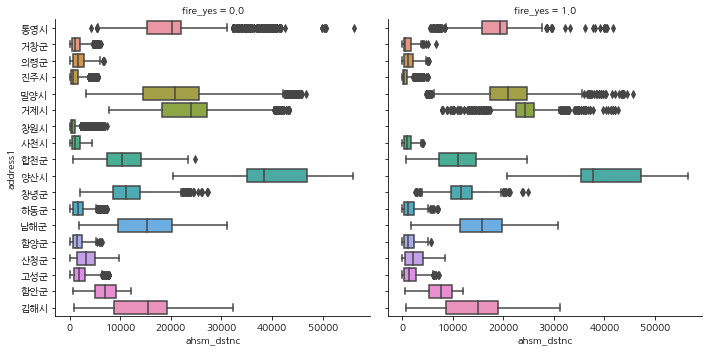

In [16]:
plt.figure(figsize=(8, 16))
sns.catplot(x='ahsm_dstnc', y='address1', col='fire_yes', kind='box', data=df)
plt.show()

In [76]:
sns.catplot(x='ahsm_dstnc', y='jmk_장', col='fire_yes', kind='box', data=df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000013E50FA67B8> (for post_execute):


KeyboardInterrupt: 

## 빌딩면적 0 채우기

In [27]:
df['bldng_ar'].value_counts()

0.000       9987
46.280       315
59.500       273
49.590       242
52.890       238
39.670       235
26.450       229
56.200       224
29.750       195
33.060       191
66.120       186
62.810       177
42.980       168
69.420       138
23.140       137
49.580       135
79.340       128
36.360       128
19.830       112
42.970       111
72.730       111
66.000       104
85.950       102
59.510        92
76.030        91
198.000       89
66.110        86
82.640        81
52.900        80
99.000        79
            ... 
282.620        1
236.690        1
264.480        1
133.865        1
2842.400       1
113.980        1
1297.080       1
28.240         1
4382.520       1
436.200        1
103.630        1
826.120        1
142.470        1
96.690         1
2195.080       1
304.170        1
295.840        1
1032.800       1
48.090         1
372.720        1
1970.440       1
2427.120       1
233.180        1
844.110        1
179.000        1
109.450        1
48.910         1
1740.040      

<Figure size 720x1440 with 0 Axes>

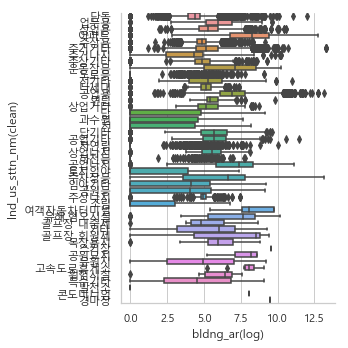

In [43]:
df['bldng_ar(log)'] = df['bldng_ar'].apply(lambda x: np.log(x) if x != 0 else 0)

plt.figure(figsize=[10, 20])
sns.catplot(x='bldng_ar(log)', y='lnd_us_sttn_nm(clean)', kind='box', data=df[df['bldng_ar'].notnull()])

## ttl_ar

<Figure size 720x2160 with 0 Axes>

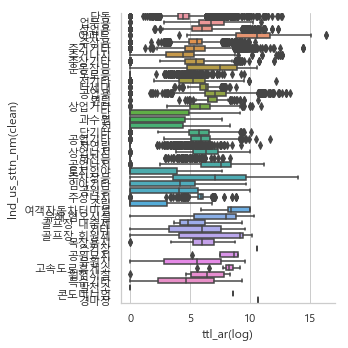

In [44]:
df['ttl_ar(log)'] = df['ttl_ar'].apply(lambda x: np.log(x) if x != 0 else 0)

plt.figure(figsize=[10, 30])
sns.catplot(x='ttl_ar(log)', y='lnd_us_sttn_nm(clean)', kind='box', data=df[df['ttl_ar'].notnull()])

## lnd_ar

<Figure size 720x2160 with 0 Axes>

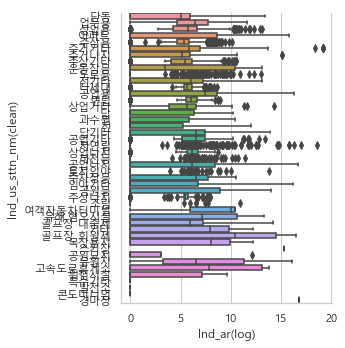

In [45]:
df['lnd_ar(log)'] = df['lnd_ar'].apply(lambda x: np.log(x) if x != 0 else 0)

plt.figure(figsize=[10, 30])
sns.catplot(x='lnd_ar(log)', y='lnd_us_sttn_nm(clean)', kind='box', data=df[df['lnd_ar'].notnull()])

# 용적률 ttl / lnd
토지이용상황명 lnd_us_sttn_nm 과 용적률 상관관계 있지 않을까

In [80]:
df['ttl/lnd'] = df['ttl_ar'] * 100 / df['lnd_ar']

In [83]:
(df[df['ttl/lnd'] == 0])

,address,address1,address2,ahsm_dstnc,bldng_ar,bldng_cnt,bldng_cnt_in_50m,cctv_dstnc,cctv_in_100m,day,...,lnd_us_sttn_nm_구,lnd_us_sttn_nm_체,lnd_us_sttn_nm_과,lnd_us_sttn_nm_묘,lnd_us_sttn_nm_공,lnd_us_sttn_nm_원,lnd_us_sttn_nm_사,lnd_us_sttn_nm_제,lnd_us_sttn_nm_수,ttl/lnd
3487,밀양시 내일동,밀양시,내일동,21635,0.00,1,38,23,4,26,...,False,False,False,False,False,False,False,False,False,0.0
4475,창원시 회원2동,창원시,회원2동,757,0.00,1,0,35,6,2,...,False,False,False,False,False,False,False,False,False,0.0
9677,창녕군 창녕읍,창녕군,창녕읍,11478,0.00,2,6,17,3,9,...,False,False,False,False,False,False,False,False,False,0.0
9771,창녕군 창녕읍,창녕군,창녕읍,11646,0.00,1,5,53,3,22,...,False,False,False,False,False,False,False,False,False,0.0
11849,창녕군 영산면,창녕군,영산면,13811,0.00,5,1,55,2,31,...,False,False,False,False,False,False,False,False,False,0.0
13248,거제시 옥포1동,거제시,옥포1동,24903,88.20,1,6,18,5,17,...,False,False,False,False,False,False,False,False,False,0.0
15036,창원시 진전면,창원시,진전면,296,0.00,3,0,116,0,1,...,False,False,False,False,False,False,False,False,False,0.0
15060,창원시 산호동,창원시,산호동,521,0.00,1,13,50,2,2,...,False,False,False,False,False,False,False,False,False,0.0
15639,창원시 진북면,창원시,진북면,3235,0.00,6,0,1707,0,1,...,False,False,False,False,False,False,False,False,False,0.0
16174,거제시 하청면,거제시,하청면,16961,57.11,4,0,1283,0,19,...,False,False,False,False,False,False,False,False,False,0.0


In [90]:
df.groupby('lnd_us_sttn_nm(clean)')['ttl/lnd'].median()

lnd_us_sttn_nm(clean)
경마장           0.222834
고속도로휴게소      14.589085
골프장 대중제      36.835866
골프장 회원제       0.722682
공업기타         42.941757
공업나지         68.443767
공업용          49.158943
공원등           4.254840
공원묘지               inf
과수원          38.335709
기타           10.155014
다세대         164.605263
단독           56.872587
답            28.491379
답기타          32.573560
도로등          52.397849
목장용지         19.226857
발전소                NaN
상업기타        136.488889
상업나지        165.762392
상업용         175.903326
스키장           0.977752
아파트                inf
업무용          98.400000
여객자동차터미널     68.665394
연립          178.597806
운동장등         24.642857
위험시설               inf
유원지          18.525085
유해.혐오시설      35.894207
임야기타         32.000000
자연림          72.377792
전            33.102315
전기타          32.727303
조림                 inf
주거기타         44.583710
주거나지         80.816834
주상기타        115.929710
주상나지        162.250000
주상용         151.674986
주차장등        343.451776
콘도미니엄              inf
토지임야        

<Figure size 720x2160 with 0 Axes>

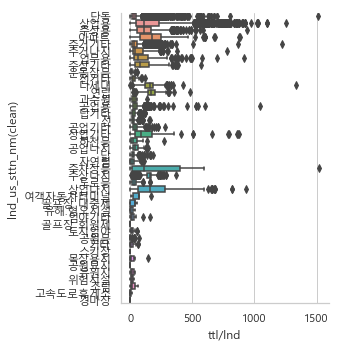

In [50]:
data = df[df['ttl/lnd'] < 2_000]

plt.figure(figsize=[10, 30])
sns.catplot(x='ttl/lnd', y='lnd_us_sttn_nm(clean)', kind='box', data=data)

In [51]:
df.columns

Index(['id', 'tag', 'fire_yes', 'year', 'month', 'day', 'dayofweek',
       'year-month', 'year-month-day', 'hour', 'minute', 'second', 'tmprtr',
       'ttl_ar', 'wnd_drctn', 'wnd_spd', 'hmdt', 'bldng_ar', 'lnd_ar',
       'bldng_cnt', 'fr_mn_cnt', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc',
       'fr_wthr_fclt_in_100m', 'hm_cnt', 'no_tbc_zn_dstnc',
       'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc', 'ahsm_dstnc',
       'bldng_cnt_in_50m', 'cctv_dstnc', 'cctv_in_100m', 'address', 'address1',
       'address2', 'jmk', 'lnd_us_sttn_nm(clean)', 'mlt_us_yn(encode)',
       'bldng_ar(clean)', 'bldng_ar(log)', 'ttl_ar(log)', 'lnd_ar(log)',
       'ttl/lnd', 'ttl/lnd(log)'],
      dtype='object')

## dstnc 컬럼도 0 이 null 값인지 확인
ar 면적 컬럼에서는 0인 데이터가 1_000 ~ 10_000 단위인데 비해 적음

In [67]:
df[df['sft_emrgnc_bll_dstnc'] == 0] # 0
df[df['cctv_dstnc'] == 0] # 6
df[df['ahsm_dstnc'] == 0] # 32
df[df['tbc_rtl_str_dstnc'] == 0] # 109
df[df['no_tbc_zn_dstnc'] == 0] # 61
df[df['fr_wthr_fclt_dstnc'] == 0] # 18
df[df['fr_sttn_dstnc'] == 0] # 0

,id,tag,fire_yes,year,month,day,dayofweek,year-month,year-month-day,hour,...,address2,jmk,lnd_us_sttn_nm(clean),mlt_us_yn(encode),bldng_ar(clean),bldng_ar(log),ttl_ar(log),lnd_ar(log),ttl/lnd,ttl/lnd(log)
